### This is the First Part of Model Design Stage 

### Part 1 ==============================> Title Based Similarity

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.metrics.pairwise import pairwise_distances
import nltk
import requests
import os
import shutil
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from PIL import Image
from io import BytesIO
from gensim.models import Word2Vec, KeyedVectors

# Title based Similarity

First Things First:
We will work now on title feature only, it's one of the most informative feature beside image and believe me it's very useful, as long as we in the cleaning data part got rid of similar title we will not face product with identical or semi-identical title.

We will try the following models with Word2Vec in order to decide which one is the best in term of distance:



1.   Bag of Words (BOW)

2.   TfIdf

3.   Average Word2Vec

4.   Idf Average Word2Vec

We will use Google news pretrained model in orderd to apply Word2Vec with limit to 2 million words and that would be enough for our task


Something to mention that we need 12+ GB of Ram in order to apply and run the following cells otherwise you shall save and load the data each time to protect your session from collapsing.

In [ ]:
data = pd.read_pickle("pickle_data3")

In [ ]:
# Define Bag of Words based Sickit-Learn
vectorizer = CountVectorizer()
title_features = vectorizer.fit_transform(data["title"])

# this would yield the Number of rows * number of words we have in dataset each word in one column
title_features.get_shape()

Display_Image function will download the image first from large_image_product column in case we choose not to download images first, read it then dispaly it, in case you have already done downloding the images you don't need it as we will see later.

In [ ]:
def display_image(url):

  # Download images source
  response = requests.get(url)
  # Read image binary content
  img = Image.open(BytesIO(response.content))
  
  # Plotting image
  plt.imshow(img)
  plt.axis("off")
  plt.show()

In [ ]:
def apply_bow(row_id, k):

  # row_id ================> The query row
  # k      ================> Number of desired result to retrive
  
  # get the distance between row_id and each row
  dist = pairwise_distances(title_features, title_features[row_id])
  
  # get the indices of the smallest distances [indices inside argsort itself] (the closest)
  indices_of_nearest = np.argsort(dist.flatten())[:k]
  
  # get the actual value of distance, which we need it to check if the model work well
  value_of_nearest = np.sort(dist.flatten())[:k]
  
  # get the index of each one, meaning the first column which is the number of each row here.
  indices_in_df = list(data.index[indices_of_nearest])
  
  for i in range(k):
    if i == 0:
      print("The Query Data:")
    try:
      display_image(data['large_image_url'].loc[indices_in_df[i]])
    except:
      # In case of corrupted images
      print("Not Available Image For This Product")

    print()
    print("ASIN:", data['asin'].loc[indices_in_df[i]])
    print("Brand:", data['brand'].loc[indices_in_df[i]])
    print("Type:", data['product_type_name'].loc[indices_in_df[i]])
    print("Title:", data['title'].loc[indices_in_df[i]])
    print("Distance between two data points =", value_of_nearest[i])
    print("-" * 100)

Applying each techinque from now will show the data of query product, and top K similar product data including image, type, brand, asin, title and distance from query product.

The more the distance the less similar between two products and vice-versa, we shall present them from the most similar (the nearest) to the least similar (the farest).

The Query Data:


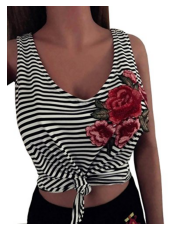


ASIN: B071WC1F83
Brand: Lily-Li
Title: women summer casual stretchy embroidered floral cami crop tank tops 
Distance between two data points = 0.0
----------------------------------------------------------------------------------------------------


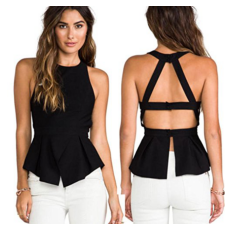


ASIN: B01HGDZBZM
Brand: Sunward Clothing
Title: sunwardtm summer casual tank tops vest women 
Distance between two data points = 2.6457513110645907
----------------------------------------------------------------------------------------------------


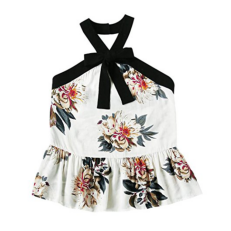


ASIN: B073JM5F3Q
Brand: Highpot
Title: highpot women floral sleeveless crop tank tops casual cami vest blouse 
Distance between two data points = 2.6457513110645907
----------------------------------------------------------------------------------------------------


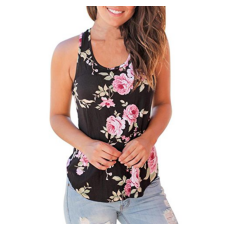


ASIN: B073S64543
Brand: Flank
Title: flank women casual sleeveless floral vest cami tank tops 
Distance between two data points = 2.6457513110645907
----------------------------------------------------------------------------------------------------


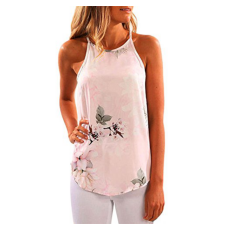


ASIN: B073W7N43V
Brand: EKIMI
Title: ekimi women summer casual sleeveless tank tops tshirt 
Distance between two data points = 2.8284271247461903
----------------------------------------------------------------------------------------------------


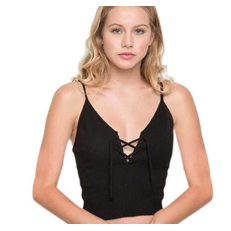


ASIN: B071HM1F33
Brand: Sumilulu
Title: sumilulu women knitted crop tops casual cotton cami tank tops 
Distance between two data points = 2.8284271247461903
----------------------------------------------------------------------------------------------------


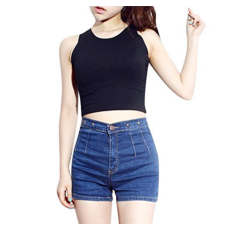


ASIN: B071S5WMRC
Brand: ELINKMALL
Title: elinkmall women summer casual sleeveless skinny tank tops 
Distance between two data points = 2.8284271247461903
----------------------------------------------------------------------------------------------------


In [ ]:
# Getting top seven similar product to product with index 66
# The first product is the query product itself so we basically retrive 6 not 7 in this case
apply_bow(row_id = 66, k = 7)

that's look good but we can improve this result more by trying another information retrival models, because BOW is just a naive type of information retrival method which only depend on counting of words in corpus and i only work on title data for now, even though title is very important feature, but image, brand and type is efficent feature as we are gonna see later.

We shall try now TF-IDF in order to see if this would preform better or not, and clearly this would give better result but why?

I will answer this question after showing the result.

In [ ]:
# Define Tf-Idf based Sickit-Learn
tf_idf = TfidfVectorizer(min_df = 0)
title_features = tf_idf.fit_transform(data['title'])
title_features.get_shape()

(100000, 35555)

In [ ]:
# The same code and explanation goes here as with apply_bow so no need to explain the code here again

def apply_tfidf(row_id, k):

  distance = pairwise_distances(title_features, title_features[row_id])
  indices_of_nearest = np.argsort(distance.flatten())[:k]
  value_of_nearest = np.sort(distance.flatten())[:k]
  indices_in_df = list(data.index[indices_of_nearest])


  for i in range(k):
    if i == 0:
      print("The Query Data:")
    try:
      display_image(data['large_image_url'].loc[indices_in_df[i]])
    except:
      print("Not Available Image For This Product")      
    print()
    print("ASIN:", data['asin'].loc[indices_in_df[i]])
    print("Brand:", data['brand'].loc[indices_in_df[i]])
    print("Type:", data['product_type_name'].loc[indices_in_df[i]])
    print("Title:", data['title'].loc[indices_in_df[i]])
    print("Distance between two data points =", value_of_nearest[i])
    print("-" * 100)


The Query Data:


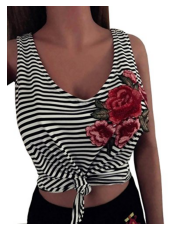


ASIN: B071WC1F83
Brand: Lily-Li
Title: women summer casual stretchy embroidered floral cami crop tank tops 
Distance between two data points = 0.0
----------------------------------------------------------------------------------------------------


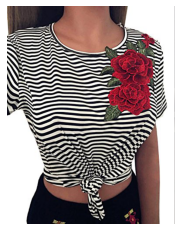


ASIN: B071LR5RY7
Brand: Lily-Li
Title: womens short sleeve cotton black white striped summer casual stretchy embroidered floral tees t shirts tops 
Distance between two data points = 0.9281684748336275
----------------------------------------------------------------------------------------------------


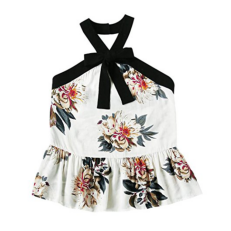


ASIN: B073JM5F3Q
Brand: Highpot
Title: highpot women floral sleeveless crop tank tops casual cami vest blouse 
Distance between two data points = 0.9987935272896598
----------------------------------------------------------------------------------------------------


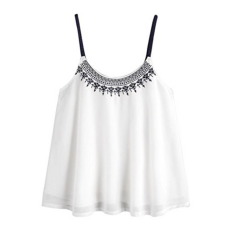


ASIN: B071XNTDFF
Brand: LOVELYIVA
Title: womens tank lovelyiva summer women chiffon embroidered tank tops sleeveless cami top blouse 
Distance between two data points = 1.002765242310321
----------------------------------------------------------------------------------------------------


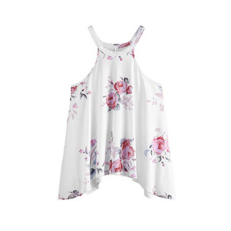


ASIN: B072WPD8XG
Brand: Highpot
Title: highpot women floral sleeveless tank crop tops cami vest casual shirt blouse 
Distance between two data points = 1.0066698556418219
----------------------------------------------------------------------------------------------------


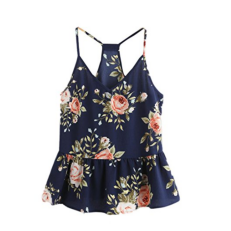


ASIN: B073QHMK74
Brand: Vovotrade
Title: vovotrade women crop cami tops floral casual sleeveless vest tank shirt blouse 
Distance between two data points = 1.0175781839806224
----------------------------------------------------------------------------------------------------


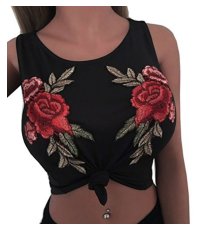


ASIN: B072QCPP5Y
Brand: FAROOT
Title: womens floral embroidered sleeveless vest crop tank top t shirt 
Distance between two data points = 1.0249115244801517
----------------------------------------------------------------------------------------------------


In [ ]:
# Sticking with the same data query
apply_tfidf(row_id = 66, k = 7)

This is better than Bag of Words no doubt, but still we can imporve it if we include semantic of the words in the title into consideration.

Now, We are gonna use semantic text based similarity, for that matter we are gonna use Avg Word2Vec and IDF Word2Vec.

Coming back to my question about why TfIdf is better than BOW?
To answer this question one should know that in TfIdf and specificaly in this problem we don't care much about Tf rather than that we only care about Idf and that's because the title data we have vary a lot in term of length and that would affect the Tf a lot but still useful comparing with BOW because if we have common rare words between two products titles this would be very informative for our alogrithm to know that both are similar.

unfortunately this will suffer from lacking of semantic meaning but we shall deal with that as long as we use Word2Vec.

For the the sake of using W2V, we have 2 chocies:

1.   Build W2V model from our corpus. 

2.   Use trained model to get the vector repesentation of each word, 

and for this problem we decided to use the second option, specifically we will use Google News model to represent each word with vector of 300 dimension.

In [ ]:
# File destination name and source
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
# Getting the model from Amazon servers
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
# Loading the model to our system
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary = True, limit = 2000000)

--2021-09-15 11:24:25--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.139.5
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.139.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  76.3MB/s    in 23s     

2021-09-15 11:24:48 (67.6 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



Number of word in Google News Model is basically 3 Million but here
we only will use 2 Million because with default parameter (3 Million) this would require a lot of memory.

Beside that limit argument will only load the supplied number of vectors – so you could use limit = 500000 to cut the memory requirements by about 5/6 times. (And, since the GoogleNews and other vector sets are usually ordered from most- to least-frequent words, you'll get the most frequent 500K words. Lower-frequency words generally have much less value and even not-as-good vectors, so it may not hurt much to ignore them.)


In [ ]:
# Getting the vocublary of Google News Model
vocab = word2vec.vocab
# This would yield 2 Million
print(len(vocab))

We don't just wanna apply Word2Vec to each word, Here we have a sentences which contain many words for that what will do as follow:


1.   Create 300 length numpy array to each word.

2.   Sum up those arrays togeather.

3.   Divide result vector by number of words in the sentenc to get Avg Word2Vec.


In [ ]:
def avg_w2v(sentence):

  # Define 300 numpy array for each word
  feature_vector = np.zeros((300), dtype = np.float32)
  n = 0
  
  # Splitting the sentence into words
  for word in sentence.split():
    n += 1
    # If the word in our vocabulary go into processing
    if word in vocab:
      feature_vector = np.add(feature_vector, word2vec[word])
  # To avoid dividing by zero in case short sentence with no words founded in the vocabulary
  # Very rare to happed but still should handle it
  if n > 0:
    feature_vectore = np.divide(feature_vector, n)

  return feature_vector

In [ ]:
# This cell is to convert our title column into 300 dims vector for each row
# So we don't have to call avg_w2v function each time we want to call apply_w2v function
corpus_w2v = []

for i in data['title']:
  corpus_w2v.append(avg_w2v(i))

corpus_w2v = np.array(corpus_w2v)

In [ ]:
def apply_avg_w2v(index, k):

  # reshape data with (-1, 1) if it's single feature, and with (1, -1) if it's just a single instance
  distance = pairwise_distances(corpus_w2v, corpus_w2v[index].reshape(1, -1))
  indices_of_nearest = np.argsort(distance.flatten())[:k]
  value_of_nearest = np.sort(distance.flatten())[:k]
  indices_in_df = list(data.index[indices_of_nearest])

  for i in range(k):
    if i == 0:
      print("The Query Data:")
    display_image(data['large_image_url'].loc[indices_in_df[i]])
    print()
    print("ASIN:", data['asin'].loc[indices_in_df[i]])
    print("Brand:", data['brand'].loc[indices_in_df[i]])
    print("Type:", data['product_type_name'].loc[indices_in_df[i]])
    print("Title:", data['title'].loc[indices_in_df[i]])
    print("Distance between two data points =", value_of_nearest[i])
    print("-" * 100) 

The Query Data:


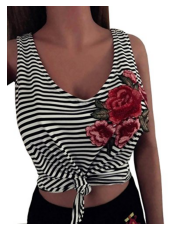


ASIN: B071WC1F83
Brand: Lily-Li
Title: women summer casual stretchy embroidered floral cami crop tank tops 
Distance between two data points = 0.0
----------------------------------------------------------------------------------------------------


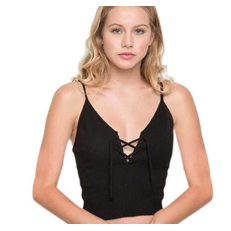


ASIN: B071HM1F33
Brand: Sumilulu
Title: sumilulu women knitted crop tops casual cotton cami tank tops 
Distance between two data points = 6.6277003
----------------------------------------------------------------------------------------------------


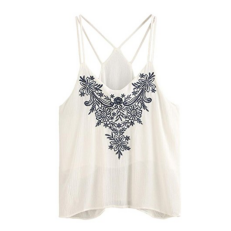


ASIN: B0725FQ9QF
Brand: bestpriceam
Title: bestpriceam women tank tops flower embroidered strappy cami top 
Distance between two data points = 6.657791
----------------------------------------------------------------------------------------------------


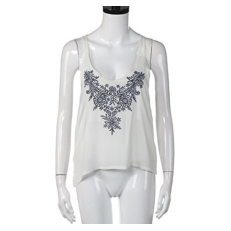


ASIN: B0716C36B7
Brand: Putars
Title: putars women summer fashion tank tops flower embroidered strappy cami top white 
Distance between two data points = 6.6991315
----------------------------------------------------------------------------------------------------


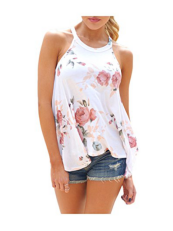


ASIN: B072JMD9YF
Brand: Sumtory
Title: sumtory women sleeveless floral printed summer flowy tank tops 
Distance between two data points = 6.7218027
----------------------------------------------------------------------------------------------------


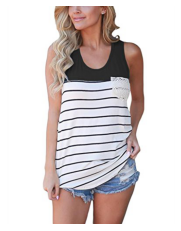


ASIN: B073GZFHR4
Brand: JomeDesign
Title: jomedesign womens summer striped racerback casual cami tank tops 
Distance between two data points = 6.8080153
----------------------------------------------------------------------------------------------------


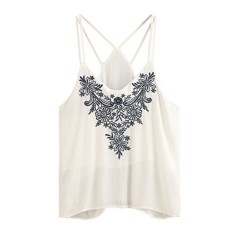


ASIN: B06XKS9MX4
Brand: Mosunx(TM)
Title: womens tank tops mosunxtm flower embroidered strappy cami top 
Distance between two data points = 6.9432507
----------------------------------------------------------------------------------------------------


In [ ]:
apply_avg_w2v(index = 66, k = 7)

The result above look good but i myself would rather not to give each word the same weight because word which repeated a lot across corpus will not be really useful in compare to rare words, for that i shall use Idf Word2Vec rather than normal average Word2Vec as it was proven to perform better than the latter one.

Now if we want to use IDF Word2Vec we shall get the frequency of each word in the corpus itself, and that exactly what the next few lines do using BOW.

In [ ]:
# We use this here if we wanted to multiple each word with it's frequency not with it's IDF
# getting list of words in our corpus
wordlist = vectorizer.get_feature_names()
# count the frequency of each word across the corpus
countlist = np.asarray(title_features.sum(axis = 0))[0]
# mapping the frequency to the word itself
words_frequency = dict(zip(wordlist, countlist))

In [ ]:
idf_vectorizer = TfidfVectorizer(use_idf = True)
idf_vectorizer.fit_transform(data["title"])
# this line is the most important line here
idf = idf_vectorizer.idf_

In [ ]:
# Log (Number of document / number of document where word appear)
num_of_words = len(idf)
print("Total number of words in corpus", num_of_words)

In [ ]:
# Trying to get Idf value of some word in the corpus
idf_vocab = idf_vectorizer.vocabulary_
print("Idf value for the word tshirt =", idf[idf_vectorizer.vocabulary_["tshirt"]])

Idf value for the word tshirt = 2.8630276783276156


In [ ]:
# The same explanation here as wtih avg_w2v
def idf_w2v(sentence):

  feature_vector = np.zeros((300), dtype = np.float32)
  freq_sum = 0
  for word in sentence.split():
    if word in vocab:
      
      if i in idf_vocab:
        feature_vector = np.add(feature_vector, word2vec[word] * idf[idf_vocab[word]])
        freq_sum += idf[idf_vocab[word]]
      else:
        feature_vector = np.add(feature_vector, word2vec[word])
    
    if freq_sum != 0:
      feature_vector = np.divide(feature_vector, freq_sum)

  return feature_vector

In [ ]:
# Bulding the Wor2Vec Vector of Vectors
corpus_w2v = []

for i in data['title']:
  corpus_w2v.append(idf_w2v(i))

corpus_w2v = np.array(corpus_w2v)

In [ ]:
def apply_idf_w2v(index, k):

  distance = pairwise_distances(corpus_w2v, corpus_w2v[index].reshape(1, -1))
  indices_of_nearest = np.argsort(distance.flatten())[:k]
  value_of_nearest = np.sort(distance.flatten())[:k]
  indices_in_df = list(data.index[indices_of_nearest])

  for i in range(k):
    if i == 0:
      print("The Query Data:")
    try:
      display_image(data['large_image_url'].loc[indices_in_df[i]])
    except:
      print("Not Available Image For This Product")
    print()
    print("ASIN:", data['asin'].loc[indices_in_df[i]])
    print("Brand:", data['brand'].loc[indices_in_df[i]])
    print("Type:", data['product_type_name'].loc[indices_in_df[i]])
    print("Title:", data['title'].loc[indices_in_df[i]])
    print("Distance between two data points =", value_of_nearest[i])
    print("-" * 100) 

The Query Data:


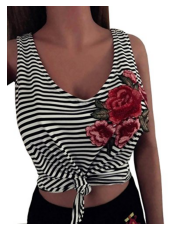


ASIN: B071WC1F83
Brand: Lily-Li
Title: women summer casual stretchy embroidered floral cami crop tank tops 
Distance between two data points = 0.0
----------------------------------------------------------------------------------------------------


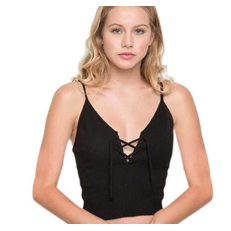


ASIN: B071HM1F33
Brand: Sumilulu
Title: sumilulu women knitted crop tops casual cotton cami tank tops 
Distance between two data points = 6.6277003
----------------------------------------------------------------------------------------------------


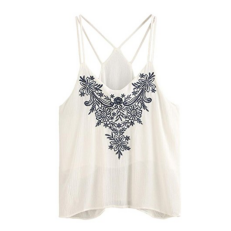


ASIN: B0725FQ9QF
Brand: bestpriceam
Title: bestpriceam women tank tops flower embroidered strappy cami top 
Distance between two data points = 6.657791
----------------------------------------------------------------------------------------------------


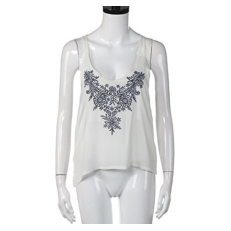


ASIN: B0716C36B7
Brand: Putars
Title: putars women summer fashion tank tops flower embroidered strappy cami top white 
Distance between two data points = 6.6991315
----------------------------------------------------------------------------------------------------


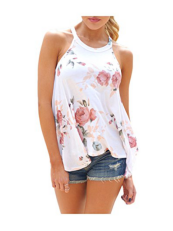


ASIN: B072JMD9YF
Brand: Sumtory
Title: sumtory women sleeveless floral printed summer flowy tank tops 
Distance between two data points = 6.7218027
----------------------------------------------------------------------------------------------------


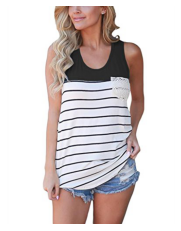


ASIN: B073GZFHR4
Brand: JomeDesign
Title: jomedesign womens summer striped racerback casual cami tank tops 
Distance between two data points = 6.8080153
----------------------------------------------------------------------------------------------------


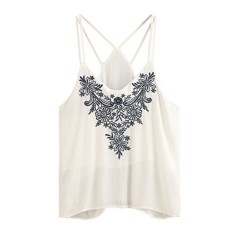


ASIN: B06XKS9MX4
Brand: Mosunx(TM)
Title: womens tank tops mosunxtm flower embroidered strappy cami top 
Distance between two data points = 6.9432507
----------------------------------------------------------------------------------------------------


In [ ]:
apply_idf_w2v(index = 66, k = 7)

The Query Data:


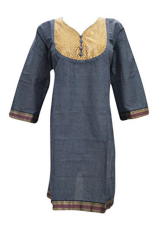


ASIN: B0717BNXDL
Brand: Mogul Interior
Title: mogul womens ethnic kurta tunic front button gray cotton dress kaftan 
Distance between two data points = 0.0
----------------------------------------------------------------------------------------------------


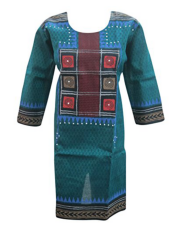


ASIN: B06XZ1S9ZM
Brand: Mogul Interior
Title: mogul ethnic kurta tunic blue printed cotton dress kaftan 
Distance between two data points = 5.836102
----------------------------------------------------------------------------------------------------


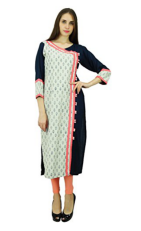


ASIN: B01M0PWH83
Brand: Phagun
Title: phagun cotton floral kurta ethnic designer tunic dress button down kurti 
Distance between two data points = 7.322387
----------------------------------------------------------------------------------------------------


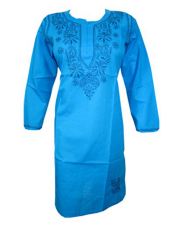


ASIN: B071JB2W6Y
Brand: Mogul Interior
Title: mogul womans tunic caftan dress blue embroidered cotton kurta xxl 
Distance between two data points = 7.363053
----------------------------------------------------------------------------------------------------


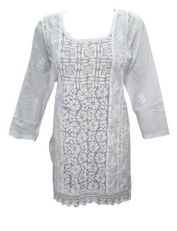


ASIN: B07226VWW1
Brand: Mogul Interior
Title: mogul womens embroidered tunic blouse white cotton short kurti dress 
Distance between two data points = 7.56086
----------------------------------------------------------------------------------------------------


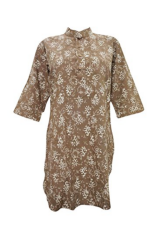


ASIN: B01N6Q79AD
Brand: Mogul Interior
Title: womens ethnic tunic dress cotton brown printed kurti blouse s 
Distance between two data points = 7.8445354
----------------------------------------------------------------------------------------------------


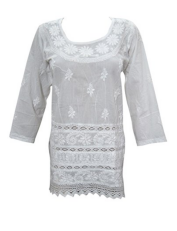


ASIN: B013OX5OB4
Brand: Mogul Interior
Title: mogul womens cotton hand embroidered tunic top kurti blouse dress 
Distance between two data points = 7.91543
----------------------------------------------------------------------------------------------------


In [ ]:
apply_idf_w2v(8, k = 7)

I thik this is the best result we have got yet in comparison to use BOW, TfIdf and Average Word2Vec this result is a little bit better.

Keep in min that so far i have only used Title feature, we have more feature to deal with, we shall design model for each one of Image, Type and Brand.

Note that in the cleaning stage i dropped color and price features from the processing as i saw that the rest features would be more useful.